In [1]:
import os
import sys

sys.stderr = open(os.devnull, "w")

import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from datetime import timedelta
from tqdm import tqdm
from dateutil.relativedelta import relativedelta
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, root_mean_squared_error
from scipy.stats import median_abs_deviation
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Input, Dense, LSTM, Dropout

warnings.filterwarnings('ignore', category=FutureWarning)

tf.random.set_seed(42)
np.random.seed(42)

In [2]:
def bootstrap_models(X, y, n_bootstraps=10):
    models = []
    i = 1
    for _ in range(n_bootstraps):
        print('#bootstrap:', i)
        idx = np.random.choice(len(X), size=len(X), replace=True)
        X_boot, y_boot = X.iloc[idx], y.iloc[idx]
        scaler = StandardScaler()
        X_boot_scaled = scaler.fit_transform(X_boot)
        X_boot_scaled = np.reshape(X_boot_scaled, (X_boot.shape[0], 1, X_boot.shape[1]))
        early_stopping = EarlyStopping(patience=3)
        model = Sequential()
        model.add(Input(shape=(1, 24)))
        model.add(LSTM(128, activation='relu', return_sequences=True))
        model.add(Dropout(0.5))
        model.add(Dense(1))
        model.compile(loss='mean_absolute_error', optimizer='adam')
        model.fit(X_boot_scaled, y_boot, epochs=500, batch_size=32, validation_split=0.1, shuffle=False, callbacks=early_stopping, verbose=2)
        models.append(model)
        i += 1
    return models

In [3]:
sales = pd.read_csv('pedidos.csv', sep=';')

In [4]:
df = sales[['account_id', 'sales_channel_id']].value_counts()
df = pd.DataFrame(df).reset_index()

In [5]:
LOOKBACK = 3
SEASONAL_PERIODS = (24, 24*7)
END_DATE = pd.to_datetime(pd.to_datetime(sales['created_date'].max()).strftime("%Y-%m-%d %H:00:00"))
START_DATE = END_DATE - timedelta(hours=END_DATE.hour)
TEST_SIZE = int((END_DATE - START_DATE).seconds / 60**2 + 1)

In [6]:
OOT_DATE = START_DATE + timedelta(hours=23)

In [7]:
OOT_PERIODS = int((OOT_DATE - END_DATE).seconds / 60**2 + 1)

In [8]:
oot_dates = pd.DatetimeIndex([END_DATE+timedelta(hours=h) for h in range(1, OOT_PERIODS)], freq='h')
df_oot = pd.DataFrame(index=oot_dates)

account_id: f9129295-bb08-4330-b60c-9f0beadda521
sales_channel_id: 1
price_total_agg
Epoch 1/500
60/60 - 1s - 10ms/step - loss: 320622.0938 - val_loss: 316069.0938
Epoch 2/500
60/60 - 0s - 1ms/step - loss: 320620.6562 - val_loss: 316067.1562
Epoch 3/500
60/60 - 0s - 1ms/step - loss: 320616.8438 - val_loss: 316062.4688
Epoch 4/500
60/60 - 0s - 1ms/step - loss: 320608.9688 - val_loss: 316054.1250
Epoch 5/500
60/60 - 0s - 1ms/step - loss: 320596.3750 - val_loss: 316042.0625
Epoch 6/500
60/60 - 0s - 1ms/step - loss: 320579.6875 - val_loss: 316026.6250
Epoch 7/500
60/60 - 0s - 1ms/step - loss: 320558.6562 - val_loss: 316007.9688
Epoch 8/500
60/60 - 0s - 1ms/step - loss: 320533.5000 - val_loss: 315986.0938
Epoch 9/500
60/60 - 0s - 3ms/step - loss: 320504.5938 - val_loss: 315961.3750
Epoch 10/500
60/60 - 0s - 2ms/step - loss: 320471.7500 - val_loss: 315933.9062
Epoch 11/500
60/60 - 0s - 2ms/step - loss: 320434.0938 - val_loss: 315903.7500
Epoch 12/500
60/60 - 0s - 2ms/step - loss: 320396.5312

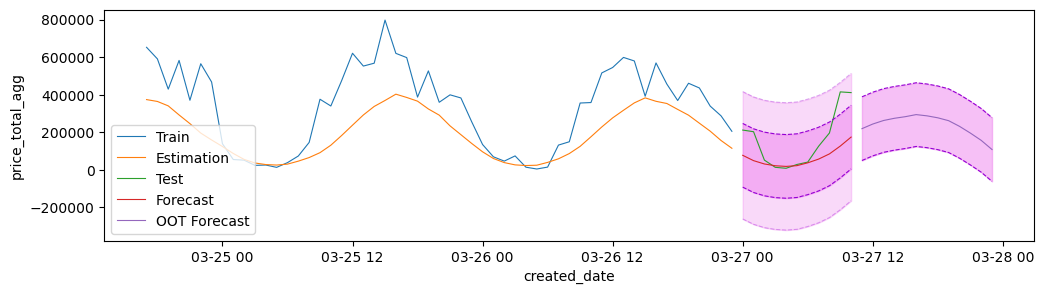

n_orders
Epoch 1/500
60/60 - 1s - 10ms/step - loss: 106.1615 - val_loss: 108.6870
Epoch 2/500
60/60 - 0s - 2ms/step - loss: 103.8096 - val_loss: 105.0266
Epoch 3/500
60/60 - 0s - 2ms/step - loss: 97.7260 - val_loss: 97.1824
Epoch 4/500
60/60 - 0s - 2ms/step - loss: 87.8419 - val_loss: 84.6705
Epoch 5/500
60/60 - 0s - 2ms/step - loss: 73.5430 - val_loss: 67.0182
Epoch 6/500
60/60 - 0s - 2ms/step - loss: 55.0469 - val_loss: 45.0624
Epoch 7/500
60/60 - 0s - 2ms/step - loss: 37.7681 - val_loss: 26.8048
Epoch 8/500
60/60 - 0s - 2ms/step - loss: 30.3293 - val_loss: 20.6388
Epoch 9/500
60/60 - 0s - 2ms/step - loss: 28.6786 - val_loss: 18.9289
Epoch 10/500
60/60 - 0s - 2ms/step - loss: 27.4022 - val_loss: 18.0234
Epoch 11/500
60/60 - 0s - 3ms/step - loss: 27.1030 - val_loss: 17.8281
Epoch 12/500
60/60 - 0s - 2ms/step - loss: 26.6921 - val_loss: 17.6659
Epoch 13/500
60/60 - 0s - 2ms/step - loss: 27.6202 - val_loss: 17.3482
Epoch 14/500
60/60 - 0s - 2ms/step - loss: 26.6758 - val_loss: 16.9555
E

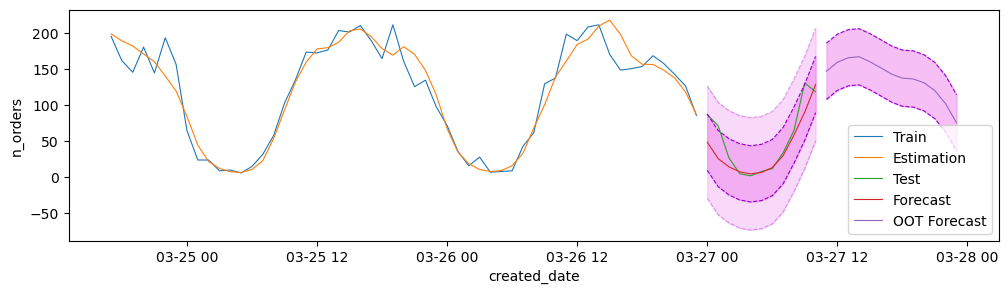

account_id: f9129295-bb08-4330-b60c-9f0beadda521
sales_channel_id: 1


KeyboardInterrupt: 

price_total_agg
Epoch 1/500
60/60 - 1s - 10ms/step - loss: 320622.0625 - val_loss: 316069.0938
Epoch 2/500
60/60 - 0s - 1ms/step - loss: 320620.7812 - val_loss: 316067.3438
Epoch 3/500
60/60 - 0s - 1ms/step - loss: 320617.0938 - val_loss: 316063.2500
Epoch 4/500
60/60 - 0s - 1ms/step - loss: 320609.6250 - val_loss: 316055.7812
Epoch 5/500
60/60 - 0s - 1ms/step - loss: 320597.7500 - val_loss: 316044.5000
Epoch 6/500
60/60 - 0s - 1ms/step - loss: 320580.6875 - val_loss: 316029.4062
Epoch 7/500
60/60 - 0s - 2ms/step - loss: 320559.7812 - val_loss: 316010.8438
Epoch 8/500
60/60 - 0s - 1ms/step - loss: 320534.4688 - val_loss: 315988.8750
Epoch 9/500
60/60 - 0s - 1ms/step - loss: 320504.2188 - val_loss: 315963.8438
Epoch 10/500
60/60 - 0s - 1ms/step - loss: 320469.9688 - val_loss: 315935.8750
Epoch 11/500
60/60 - 0s - 1ms/step - loss: 320434.8438 - val_loss: 315905.7500
Epoch 12/500
60/60 - 0s - 1ms/step - loss: 320394.6875 - val_loss: 315873.3750
Epoch 13/500
60/60 - 0s - 1ms/step - loss: 3

In [ ]:
id_pairs = list(zip(df['account_id'], df['sales_channel_id']))
summary_dict = {}
for account_id, sales_channel_id in tqdm(id_pairs):
    print(f'account_id: {account_id}')
    print(f'sales_channel_id: {sales_channel_id}')
    
    summary_dict[(account_id, sales_channel_id)] = {}
    
    cond = (sales['account_id'] == account_id) & (sales['sales_channel_id'] == sales_channel_id)
    df_client = sales[cond].drop(['account_id', 'sales_channel_id'], axis=1)
    df_client['created_date'] = pd.to_datetime(df_client['created_date'], format='%Y-%m-%d %H:%M:%S.%f %z')
    df_client = df_client.sort_values('created_date').reset_index(drop=True)
    df_client['created_date'] = df_client['created_date'].dt.strftime("%Y-%m-%d %H:00:00").reset_index(drop=True)
    
    df_client_mod = df_client.groupby('created_date').agg(price_total_agg=('price_total', 'sum'), n_orders=('created_date', 'count'))
    df_client_mod.index = pd.to_datetime(df_client_mod.index, format='%Y-%m-%d %H:00:00')
    
    end_date = pd.to_datetime(END_DATE, format='%Y-%m-%d %H:%M:%S')
    start_date = end_date - relativedelta(months=LOOKBACK)
    date_index = pd.Series(pd.date_range(start=start_date, end=end_date, freq='h', name='created_date'))
    df_client_mod = pd.merge(date_index, df_client_mod, how='left', on='created_date').set_index('created_date')
    
    oot_date_index = pd.Series(df_oot.index, name='created_date')
    combined_date_index = pd.concat([date_index, oot_date_index], axis=0)
    df_client_mod = pd.merge(combined_date_index, df_client_mod, how='left', on='created_date').set_index('created_date')
    
    forecast_dict = {}
    
    for n, col in enumerate(['price_total_agg', 'n_orders']):
        print(col)
        
        summary_dict[(account_id, sales_channel_id)][f'dataset_{n}'] = {}
        summary_dict[(account_id, sales_channel_id)][f'dataset_{n}']['name'] = col
        
        forecast_dict[f'dataset_{n}'] = {}
        
        df = df_client_mod[col]
        
        df.fillna(0, inplace=True)
        
        lags = [df.shift(l).rename(f'lag_{l}') for l in range(1, 25)]
        df_lag = pd.concat([df, pd.concat(lags, axis=1)], axis=1).dropna().asfreq('h')
        
        df_train = df_lag.loc[df_lag.index < START_DATE].copy()
        df_test = df_lag.loc[(df_lag.index >= START_DATE) & (df_lag.index <= END_DATE)].copy()
        df_oot = df_lag.loc[df_lag.index > END_DATE].copy()

        X_train, y_train = df_train.iloc[:, 1:], df_train.iloc[:, 0]
        X_test, y_test = df_test.iloc[:, 1:], df_test.iloc[:, 0]
        X_oot = df_oot.iloc[:, 1:]
        
        mad = y_train.std()
        
        # ensemble = bootstrap_models(X_train, y_train)
        
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        X_train_scaled = np.reshape(X_train_scaled, (X_train.shape[0], 1, X_train.shape[1]))
        X_test_scaled = np.reshape(X_test_scaled, (X_test.shape[0], 1, X_test.shape[1]))
        
        early_stopping = EarlyStopping(patience=3)
        model = Sequential()
        model.add(Input(shape=(1, 24)))
        model.add(LSTM(128, activation='relu', return_sequences=True))
        model.add(Dropout(0.5))
        model.add(Dense(1))
        model.compile(loss='mean_absolute_error', optimizer='adam')
        model.fit(X_train_scaled, y_train, epochs=500, batch_size=32, validation_split=0.1, shuffle=False, callbacks=early_stopping, verbose=2)
        
        estimations = pd.Series(model.predict(X_train_scaled).squeeze(), index=X_train.index)
        
        # predictions = np.column_stack([model.predict(X_train_scaled) for model in ensemble]).squeeze()
        # estimations = pd.Series(np.percentile(predictions, 50, axis=1), index=X_train.index)
        
        # predictions = np.column_stack([model.predict(X_test_scaled) for model in ensemble]).squeeze()
        # forecast_lower = pd.Series(np.percentile(predictions, 0.5, axis=1), index=X_test.index)
        # forecast = pd.Series(np.percentile(predictions, 50, axis=1), index=X_test.index)
        # forecast_upper = pd.Series(np.percentile(predictions, 99.5, axis=1), index=X_test.index)
        
        # forecast = pd.Series(np.percentile(predictions, 50, axis=1), index=X_test.index)
        forecast = pd.Series(model.predict(X_test_scaled).squeeze(), index=X_test.index)
        forecast_lower = forecast - 0.45*mad
        forecast_upper = forecast + 0.45*mad
        
        forecast_dict[f'dataset_{n}']['forecast'] = forecast
        forecast_dict[f'dataset_{n}']['forecast_lower'] = forecast_lower
        forecast_dict[f'dataset_{n}']['forecast_upper'] = forecast_upper
        
        forecast_dict[f'dataset_{n}']['oot_forecast'] = []
        forecast_dict[f'dataset_{n}']['oot_forecast_lower'] = []
        forecast_dict[f'dataset_{n}']['oot_forecast_upper'] = []
        for i in range(len(X_oot)):
            x_oot = X_oot.iloc[i].to_frame().T
            x_oot_scaled = scaler.transform(x_oot)
            x_oot_scaled = np.reshape(x_oot_scaled, (x_oot.shape[0], 1, x_oot.shape[1]))
            # predictions = np.column_stack([model.predict(x_oot_scaled) for model in ensemble])
            
            # oot_forecast_lower = np.percentile(predictions, 0.5, axis=1)[0][0]
            # oot_forecast = np.percentile(predictions, 50, axis=1)[0][0]
            # oot_forecast_upper = np.percentile(predictions, 99.5, axis=1)[0][0]
            
            oot_forecast = model.predict(x_oot_scaled)[0][0][0]
            oot_forecast_lower = oot_forecast - 0.45*mad
            oot_forecast_upper = oot_forecast + 0.45*mad
            
            forecast_dict[f'dataset_{n}']['oot_forecast'].append(oot_forecast)
            forecast_dict[f'dataset_{n}']['oot_forecast_lower'].append(oot_forecast_lower)
            forecast_dict[f'dataset_{n}']['oot_forecast_upper'].append(oot_forecast_upper)
            
            for j, k in list(zip(range(i+1, len(X_oot)), range(len(X_oot)-i-1))):
                X_oot.iloc[j, k] = oot_forecast
            
        forecast_dict[f'dataset_{n}']['oot_forecast'] = pd.Series(forecast_dict[f'dataset_{n}']['oot_forecast'], index=X_oot.index)
        forecast_dict[f'dataset_{n}']['oot_forecast_lower'] = pd.Series(forecast_dict[f'dataset_{n}']['oot_forecast_lower'], index=X_oot.index)
        forecast_dict[f'dataset_{n}']['oot_forecast_upper'] = pd.Series(forecast_dict[f'dataset_{n}']['oot_forecast_upper'], index=X_oot.index)
        
        oot_forecast_lower = forecast_dict[f'dataset_{n}']['oot_forecast_lower']
        oot_forecast = forecast_dict[f'dataset_{n}']['oot_forecast']
        oot_forecast_upper = forecast_dict[f'dataset_{n}']['oot_forecast_upper']
        
        train_pred = estimations
        train_mae = mean_absolute_error(df_train.iloc[:, 0], train_pred)
        train_rmse = root_mean_squared_error(df_train.iloc[:, 0], train_pred)

        print(f"train RMSE: {train_rmse:.3f}")
        print(f"train MAE:  {train_mae:.3f}")
        
        test_pred = forecast
        test_mae = mean_absolute_error(df_test.iloc[:, 0], test_pred)
        test_rmse = root_mean_squared_error(df_test.iloc[:, 0], test_pred)

        print(f"test RMSE: {test_rmse:.3f}")
        print(f"test MAE:  {test_mae:.3f}")
        
        summary_dict[(account_id, sales_channel_id)][f'dataset_{n}']['train RMSE'] = train_rmse
        summary_dict[(account_id, sales_channel_id)][f'dataset_{n}']['test RMSE'] = test_rmse
        summary_dict[(account_id, sales_channel_id)][f'dataset_{n}']['train MAE'] = train_mae
        summary_dict[(account_id, sales_channel_id)][f'dataset_{n}']['test MAE'] = test_mae
        
        plt.figure(figsize=(12, 3))
        sns.lineplot(df_train.iloc[-5*TEST_SIZE:, 0], lw=0.8, label='Train')
        sns.lineplot(estimations.iloc[-5*TEST_SIZE:], lw=0.8, label='Estimation')
        sns.lineplot(df_test.iloc[:, 0], lw=0.8, label='Test')
        sns.lineplot(forecast, lw=0.8, label='Forecast')
        sns.lineplot(forecast_lower, c='darkviolet', linestyle='--', lw=0.8)
        sns.lineplot(forecast_upper, c='darkviolet', linestyle='--', lw=0.8)
        sns.lineplot(2*forecast_lower-forecast, c='darkviolet', alpha=0.3, linestyle='--', lw=0.8)
        sns.lineplot(2*forecast_upper-forecast, c='darkviolet', alpha=0.3, linestyle='--', lw=0.8)
        sns.lineplot(oot_forecast, lw=0.8, label='OOT Forecast')
        sns.lineplot(oot_forecast_lower, c='darkviolet', linestyle='--', lw=0.8)
        sns.lineplot(oot_forecast_upper, c='darkviolet', linestyle='--', lw=0.8)
        plt.fill_between(x=forecast.index[-TEST_SIZE:],
                         y1=forecast_lower,
                         y2=forecast_upper,
                         color='violet',
                         alpha=0.5)
        plt.fill_between(x=forecast.index[-TEST_SIZE:],
                         y1=2*forecast_lower-forecast,
                         y2=2*forecast_upper-forecast,
                         color='violet',
                         alpha=0.3)
        plt.fill_between(x=oot_forecast.index,
                         y1=oot_forecast_lower,
                         y2=oot_forecast_upper,
                         color='violet',
                         alpha=0.5)
        plt.legend()
        plt.savefig(f'plots/deep_learning/forecast_{account_id}_{sales_channel_id}_{col}_dl.png')
        plt.show();
    
    with open(f'sql/deep_learning/forecast_{account_id}_{sales_channel_id}_dl.sql', 'w') as output_file:
        pt_forecast_lower = forecast_dict['dataset_0']['forecast_lower']
        pt_forecast_upper = forecast_dict['dataset_0']['forecast_upper']
        pt_forecast = forecast_dict['dataset_0']['forecast']
        
        no_forecast_lower = forecast_dict['dataset_1']['forecast_lower']
        no_forecast_upper = forecast_dict['dataset_1']['forecast_upper']
        no_forecast = forecast_dict['dataset_1']['forecast']
        for i in range(len(df_test)):
            start_time = df_test.index[i]
            end_time = start_time + pd.Timedelta(hours=1)
            output_file.write(
                f"""
                INSERT INTO forecast (id, created, modified, platform, store_name, "start", "end",
                                      channel, seller, account_id, organization_id, store_id, minutes_interval,
                                      model, orders_high, orders_low, orders_mean, sales_high, sales_low, sales_mean)
                VALUES (gen_random_uuid(), now(), now(), 1, (select vtexid from vtex_account where id = '{account_id}'::uuid), '{start_time}', '{end_time}',
                        {sales_channel_id}, 'ALL', '{account_id}'::uuid, (select organizationid from vtex_account where id = '{account_id}'::uuid), NULL, 60, 'LSTM',
                        {no_forecast_upper.iloc[i]}, {no_forecast_lower.iloc[i]}, {no_forecast.iloc[i]},
                        {pt_forecast_upper.iloc[i]}, {pt_forecast_lower.iloc[i]}, {pt_forecast.iloc[i]});
                """     
                )
        
        pt_oot_forecast_lower = forecast_dict['dataset_0']['oot_forecast_lower']
        pt_oot_forecast_upper = forecast_dict['dataset_0']['oot_forecast_upper']
        pt_oot_forecast = forecast_dict['dataset_0']['oot_forecast']
        
        no_oot_forecast_lower = forecast_dict['dataset_1']['oot_forecast_lower']
        no_oot_forecast_upper = forecast_dict['dataset_1']['oot_forecast_upper']
        no_oot_forecast = forecast_dict['dataset_1']['oot_forecast']
        for i in range(len(df_oot)):
            start_time = df_oot.index[i]
            end_time = start_time + pd.Timedelta(hours=1)
            output_file.write(
                f"""
                INSERT INTO forecast (id, created, modified, platform, store_name, "start", "end",
                                      channel, seller, account_id, organization_id, store_id, minutes_interval,
                                      model, orders_high, orders_low, orders_mean, sales_high, sales_low, sales_mean)
                    VALUES (gen_random_uuid(), now(), now(), 1, (select vtexid from vtex_account where id = '{account_id}'::uuid), '{start_time}', '{end_time}',
                            {sales_channel_id}, 'ALL', '{account_id}'::uuid, (select organizationid from vtex_account where id = '{account_id}'::uuid), NULL, 60, 'LSTM',
                            {no_oot_forecast_upper.iloc[i]}, {no_oot_forecast_lower.iloc[i]}, {no_oot_forecast.iloc[i]},
                            {pt_oot_forecast_upper.iloc[i]}, {pt_oot_forecast_lower.iloc[i]}, {pt_oot_forecast.iloc[i]});
                """                            
            )

In [ ]:
dataset_0 = pd.DataFrame({k: v['dataset_0'] for k, v in summary_dict.items()}).T
dataset_1 = pd.DataFrame({k: v['dataset_1'] for k, v in summary_dict.items()}).T

In [ ]:
summary = (
    pd
    .concat([dataset_0, dataset_1], axis=0)
    .rename({'name': 'dataset'}, axis=1)
    .sort_index()
    .reset_index(names=['account_id', 'sales_channel_id'])
)
summary.to_csv('summary_dl.csv', sep=';')

summary

In [ ]:
summary.groupby('dataset')['test MAE'].mean()